# Exercise 1: Planning production in a plastic company

A company manufactures plastic components for the automotive sector. As an intern, your first assignment is to write an Integer Programming Model to calculate the optimal production plan for the plastic injection machine. The injection machine heats plastic and injects it into a mould to get a specific shape. Each mould can thus only be used to manufacture specific component types. Your first version will take into account the storage costs and the delayed orders cost which are defined below. 

**Storage costs**
The storage or inventory costs represent the cost of storing the inventory levels of every component type at every planning period and are modeled as a fixed cost per unit and planning period. The storage costs are different for every component type.

**Delayed orders costs**
At every planning period, you may delay part of the demand for next planning periods. Customers will apply a fixed penalti for every delayed unit at every period. The delayed costs are also different for every component type.

Your model needs to take into account the following additional data: 

**Initial Inventory Levels (units)**: There is an initial inventory level for every component type available at the first planning period that needs to be taken into account.

**Minimum and Maximum Inventory Levels (units)**: There is a maximum and a minimum inventory level for every component type.

**Machine capacity (units)**: The machine capacity represents the number of units of a given component type that the machine can produce using a given mould. If a mould cannot be used to manufacture a component type, the machine capacity is zero for that combination of component type and mould.

**Demand (Units)**: The company has several confirmed orders for the following periods and therefore, our model needs to take into account the demand for every product at every planning period. 

**a.** Write down the indexes and decision variables (1 point)
**Indices**

- t = periods to produce $t \in [0,..,T]$

- m = moulds $m \in [0,..,M]$

- p = products $p \in [0,..,P]$

**Decision Variables**

- $Y_{pt}$ = units to store for produt p on period t (Integer)

- $D_{pt}$ = delayed production for produt p on period t (Integer)

- $X_{pt}$ = production for produt p on period t (Integer)

- $S_{mt}$ = (Binary) {1 if mould m is used on period t, 0 otherwise}

**b.** Write down the objective function (1 point)
The objective function is to minimise storage costs and delayed order costs (eur):

$\min z = \sum_{t=0}^{T}{\sum_{p=0}^{P}{C_d·D_{pt}}} + \sum_{t=0}^{T}{\sum_{p=0}^{P}{C_s·Y_{pt}}}$ (eur)

Where: 

- $C_s$ represents the storage costs per unit and period (eur)

- $C_d$ represents the delayed order costs per unit and period (eur)

**c.** Write down the constraints (1.5 points)
**Problem Data**
- $M_{mp}$ Machine Capacity using mould m to produce product p(units)

- $R_{pt}$ Demand for product p in period t

- $Y_{p0}$ Initial inventory level of product p

- $Y_{pmax}$ Maximum inventory level of product p

- $Y_{pmin}$ Minimum inventory level of product p


**Machine Capacity Constraint**

$X_{pt} = \sum_{m=0}^{M}{M_{mp}·S_{mt}} \forall p,t$

$\sum_{m=0}^{M}{S_{mt}} = 1 \forall t$

Meaning that the number of units manufactured in period t of product p is equal to the machine capacity of the machine using the mould m. The second constraint ensures that the model is consistent and only one mould is used in one period. 

**Demand**

$Y_{pt-1} + X_{pt} - Y_{pt} = R_{pt} + D_{pt-1} - D_{pt} \forall p, t \in [1,T]$

(Initial Inventory)

$X_{p0} - Y_{p0} = R_{p0} - D_{p0} \forall p, t=0$

**Inventory levels**

$Y_{pt} \geq Y_{minp} \forall p,t$

$Y_{pt} \leq Y_{maxp} \forall p,t$


You have successfully validated your model and it is already providing valuable information for the company. Now the company would like to extend the model to take into account as well the set up costs: 

**Set up costs**
As explained above, the injection machine uses different moulds to manufacture different parts. Each time that a mould is changed to make a different component, the operators need to setup the machine. The company estimates that this setup cost only depends on the mould that is used and is only applied when a product is changed.

**d.** Modify the model to take into account the set up costs (1.5 points).

We introduce a new decision variable to model the sequence of mould changes and simplify the model: 

- $Su_{mt}$ Mould setup sequence (Binary) 1 if mould m is changed in period t, 0 otherwise.
- $C_m$ Setup costs of mould m (Eur). 

Now, the objective function becomes:


$\min z =\sum_{t=0}^{T}{\sum_{m=0}^{M}{C_m·Su_{mt}}} + \sum_{t=0}^{T}{\sum_{p=0}^{P}{C_s·D_{pt}}} + \sum_{t=0}^{T}{\sum_{p=0}^{P}{C_d·Y_{pt}}}$ (Eur)

We also need to introduce the following constraints for the new decision variable:

$Su_{m0} = S_{m0} \forall m$

Meaning that we take into account the costs of the initial setup of the machine.

$Su_{mt} \geq S_{mt} - S_{mt-1}$

Meaning that we only take into account in the costs mould changes (that is, when the mould used is different for two consecutive periods).

# Exercise 2: Strategies in temptation island
You are working as a consultant for the TV show temptation Island (Spanish edition). Production management states that, worldwide, the audience of the show greatly increases with the number of singles that seduce the girls of the participant couples. A team of psycologist have estimated the compatibility between the girls of the participant couples and the singles in the show:

|        | Ruben | Lewis | Oscar | Antonio | Bryan |
|--------|-------|-------|-------|---------|-------|
| Fianna | 0     | 0.55  | 0     | 0       | 0     |
| Andrea | 0.56  | 0     | 0     | 0       | 0     |
| Delina | .60   | 0.60  | 0     | 0       | 0     |
| Fani   | 0.80  | 0.50  | 0     | 0       | 0.6   |
| Susana | 0     | 0     | 0.7   | 0.6     | 0.5   |

**a.** Draw a Network Graph to find the optimal strategy for singles where each single focuses on seducing a participant, while at the same time the overall compatibility across all participants is maximised. Briefly describe the resulting graph using network theory definitions. (1 point)

There are two alternative methods to model this problem, the first and simplest is to model it as an assigment problem, where the weight $w_{ij}$ of each edge represents the compatibility. As an Integer Linear Programming problem, the formulation is: 

$x_{ij}$: Assigment decision variable (Binary) { 1 if single i focuses on seducing contestant j, 0 if not}

$max z = \sum_{ij}{w_{ij}· x_{ij}}$

s.t.

$\sum_{j}{x_{ij}} = 1 \forall i \\
\sum_{i}{x_{ij}} = 1 \forall j$ 

Now, to represent the diagram we can use the Graphviz library:

{('Bryan', 'Susana'): Text(0.30000000000000004, 0.0, '0.5'),
 ('Bryan', 'Fani'): Text(0.30000000000000004, 0.30000000000000004, '0.6'),
 ('Lewis', 'Fianna'): Text(0.30000000000000004, 3.3, '0.55'),
 ('Lewis', 'Delina'): Text(0.30000000000000004, 2.6999999999999997, '0.6'),
 ('Lewis', 'Fani'): Text(0.30000000000000004, 2.3999999999999995, '0.5'),
 ('Ruben', 'Andrea'): Text(0.30000000000000004, 3.7, '0.56'),
 ('Ruben', 'Delina'): Text(0.30000000000000004, 3.4, '0.6'),
 ('Ruben', 'Fani'): Text(0.30000000000000004, 3.0999999999999996, '0.8'),
 ('Oscar', 'Susana'): Text(0.30000000000000004, 1.4, '0.7'),
 ('Antonio', 'Susana'): Text(0.30000000000000004, 0.7, '0.6')}

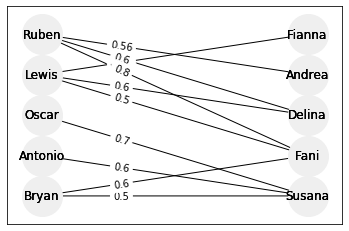

In [16]:
import networkx as nx

G = nx.DiGraph()

G.add_edges_from([("Bryan", "Susana", {"weight": 0.5}),
                  ("Lewis", "Fianna", {"weight": 0.55}),
                  ("Lewis", "Delina", {"weight": 0.6}),
                  ("Lewis", "Fani", {"weight": 0.5}),
                  ("Ruben", "Andrea", {"weight": 0.56}),
                  ("Ruben", "Delina", {"weight": 0.6}),
                  ("Ruben", "Fani", {"weight": 0.8}),
                  ("Oscar", "Susana", {"weight": 0.7}),
                  ("Antonio", "Susana", {"weight": 0.6}),
                  ("Bryan", "Fani",  {"weight": 0.6}),
                  ("Bryan", "Susana", {"weight":0.5})])

pos = {"Ruben": (0,4),
      "Lewis": (0,3),
      "Oscar": (0,2),
      "Antonio": (0,1),
      "Bryan": (0,0),
      "Fianna":(1,4),
      "Andrea":(1,3),
      "Delina":(1,2),
      "Fani":(1,1),
      "Susana":(1,0)}

nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=1600, node_color='#efefef')
nx.draw_networkx_labels(G, pos )
c_label = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=c_label, label_pos=0.7)


The resulting graph is a directed graph G=(N,E) where N is the set of nodes and E is the set of Edges. The size of N is 10 (five singles plus five candidates), therefore the order of G is 10. Also, there are 10 non-zero weights, so we can consider that this is a 10-Graph.

# Exercise 3: Maximising investments
Your startup company has just raised 100M€ in a round of funding to reinvest in the company during the next period. Using regression and historical data, your team has found the following formulas  for the Return of Investments (ROI) in different departments:

**Research and Development:**

$10·\left(\sqrt[3]{2X-2}\right)$

**Advertisement:**

$10·\left(\ln(X)-2\right)$

**Technical Equipment:**

$10·\left(e^{X/50}-2\right)$

**Human Resources:**

$10·\dfrac{X}{50}$

According to the colective agreement, the minimum investment in human resources is 20M€. 
Additionally, analysing the formulas obtained, it is clear that although significant investments in technical equipment yield a high ROI, for small investments the ROI of R&D or advertisement is actually larger. However, due to the pressure imposed by competitors, the company has decided that investments in technical equipment must be at least high enough to ensure that this concept does not have a negative impact in the ROI of the next period investments. 

**a.** Write a Non-Linear Programming Model to maximise the ROI (1.5 points)
Decicion variables
$x_n, n=[1,2,3,4]$: (nonnegative) Investment in M€ in 1: R&D, 2: Advertisement, 3: Technical Equipment, 4: Human Resources 

Maximise ROI (M€).

$\max z = 10·\left(\sqrt[3]{2x_1-2}\right) + 10·\left(\ln(x_2)-2\right) +10·\left(e^{x_3/50}-2\right) + 10·\dfrac{x_4}{50} $

s.t.

$x_1 + x_2 + x_3 + x_4 \leq 100 \\
x_4 \geq 20 \\
10·\left(e^{x_3/50}-2\right) \geq 0 \\
x_n \geq 0 \forall n
$


**b.** Write down the Kuhn-Tucker conditions (1.5 points)

First, we write down the problem in the **canonical form**:

$\max z = 10·\left(\sqrt[3]{2x_1-2}\right) + 10·\left(\ln(x_2)-2\right) +10·\left(e^{x_3/50}-2\right) + 10·\dfrac{x_4}{50} $

s.t.

$x_1 + x_2 + x_3 + x_4 - 100 \leq 0 \\
20 - x_4 \leq 0 \\
-10·\left(e^{x_3/50}-2\right) \leq 0
$

From here, we can write down the **Lagrangian**:

$L = 10·\left(\sqrt[3]{2x_1-2}\right) + 10·\left(\ln(x_2)-2\right) +10·\left(e^{x_3/50}-2\right) + 10·\dfrac{x_4}{50} \\
+ \lambda_1·(x_1 + x_2 + x_3 + x_4 - 100) \\
+ \lambda_2·(20 - x_4) \\
+ \lambda_3·(-10·\left(e^{x_3/50}-2\right)$

And, once we have computed the lagrangian, we can obtain the Kuhn-Tucker conditions:

**Gradient condition**

$
\nabla{L}=0 \\
\dfrac{dL}{dx_1} = 20/3·(2·x_1-2)^{-2/3} + \lambda_1 = 0 \\
\dfrac{dL}{dx_2} = 10·(1/x_2) + \lambda_1 = 0 \\ 
\dfrac{dL}{dx_3} = 10/50·e^{x_3/50} + \lambda_1 -\lambda_3·10/50·e^{x_3/50}  = 0 \\ 
\dfrac{dL}{dx_4} = 10/50 + \lambda_1 -\lambda_2= 0 
$

**Orthogonality condition**

$
\lambda_1·(x_1 + x_2 + x_3 + x_4 - 100) = 0 \\
\lambda_2·(20 - x_4) = 0 \\
\lambda_3·(-10·\left(e^{x_3/50}-2\right) = 0 
$

**Feasibility condition**

$
x_1 + x_2 + x_3 + x_4 - 100 \leq 0 \\
20 - x_4 \leq 0 \\
-10·\left(e^{x_3/50}-2\right) \leq 0
$

**non-negative condition**:

$
\lambda_n \leq 0 \forall n
$

**c.** Solving the problem yields a value of -0.29 for the lagrangian multiplier of the minimum investment in human resources constraint. Interpret this result. How should the company use this value in the negotiation of the next collective agreement? (1 point)

The lagrangian multiplier represents the change in the objective function per unitary change in the right hand side of the corresponding constraint. Note that, in the canonical form, if we increase the right hand side 1 unit (from 0), then we need to increase the left hand side also one unit for the equation to remain the same, for instance making the investments in human resources raise to 21M€. This yields a decrease of the ROI of -0.29M€, so the impact of increasing the investments in human resources is negative in the return for the company. In the next colective agreement negotiation, the company could use this to argue against proposals or make a proposal to reduce the investment. 